# Evaluation by Precision & Recall

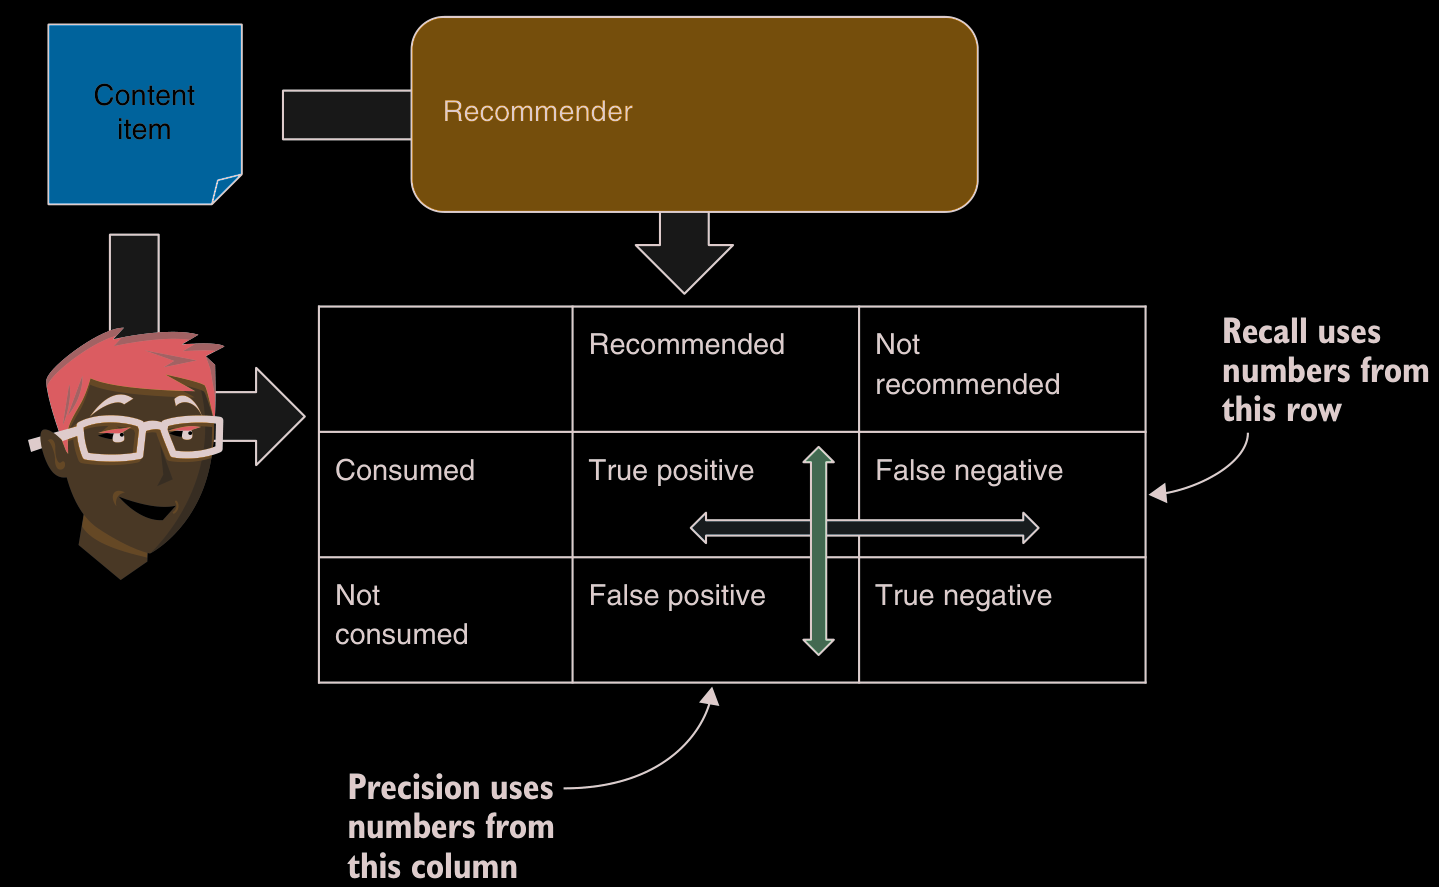

Remark. High predictive _accuracy_ but low _True-positive_ is not profitable for the business.

In [ ]:
import numpy as np

Sample Data

In [ ]:
users = np.array([ "Antar", "Tameem", "Logain", "Jumana" ])
tvShows = np.array([ "Game Of Thrones", "Peaky Blenders", "Hannah Montana", "The IT Crowded" ])

# tv shows recommended to each user
recommendations = np.array([
    [0, 0, 0, 1],  # Antar: IT Crowded recommended
    [0, 1, 1, 0],  # Tameem: Beaky Plenders, Hannah Montana recommended
    [1, 0, 0, 1],  # Logain: Game of Thrones, IT Crowded recommended
    [1, 1, 0, 0]   # Jumana: Beaky Plenders, Game of Thrones recommended
])

# users watching record after seeing recommendations
episodes_after = np.array([
    [10, 5, 15, 0],  # Antar: 10 episodes of Game of Thrones, 5 episodes of Beaky Plenders, 15 episodes of Hannah Montana
    [8, 0, 0, 12],   # Tameem: 8 episodes of Game of Thrones, 12 episodes of IT Crowded
    [6, 7, 10, 10],  # Logain: 6 episodes of Game of Thrones, 7 episodes of Beaky Plenders, 10 episodes of Hannah Montana, 10 episodes of IT Crowded
    [0, 5, 0, 8]     # Jumana: 5 episodes of Hannah Montana, 8 episodes of IT Crowded
])

Negative positive of Antar

In [ ]:
## predicted to be watched
## wrong prediction
(episodes_after[0] == 0 ) & ( recommendations[0] == 1 )

array([False, False, False,  True])

In [ ]:
# tv shows
tvShows[ (episodes_after[0] == 0 ) & ( recommendations[0] == 1 ) ]

array(['The IT Crowded'], dtype='<U15')

In [ ]:
# count
len( tvShows[ (episodes_after[0] == 0 ) & ( recommendations[0] == 1 ) ] )

1

Negative positive of all users

In [ ]:
# negative positives count of all users
[
    len( tvShows[ (episodes_after[i] == 0 ) & ( recommendations[i] == 1 ) ] )
      for i in range( len(episodes_after) )
]

[1, 2, 0, 1]

In [ ]:
# count total negative positives
np.sum([
    len( tvShows[ (episodes_after[i] == 0 ) & ( recommendations[i] == 1 ) ] )
      for i in range( len(episodes_after) )
])

4

Alternative Negative positive of all users count

In [ ]:
# negative positive of for each user and tv-show
( (episodes_after == 0) & ( recommendations == 1 ) )

array([[False, False, False,  True],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True, False, False, False]])

In [ ]:
# count total negative positive
( (episodes_after == 0) & ( recommendations == 1 ) ).sum()

4

Precision & Recall

In [ ]:
# Calculate precision and recall
def precisionRecall(episodes_after, recommendations):
    # recommended, but true prediction, so watched
    true_positives = ( (episodes_after > 0) & ( recommendations == 1 ) ).sum()
    # recommended, but false prediction, so not watched
    false_positives = ( (episodes_after == 0) & ( recommendations == 1 ) ).sum()
    # not recommended, but true prediction, so not watched
    true_negatives = ( (episodes_after > 0) & ( recommendations == 0 ) ).sum()
    # not recommended, but false prediction, so watched
    false_negatives = ( (episodes_after > 1) & ( recommendations == 0 ) ).sum()

    # out of recommended tv-shows, how many were watched by users
    precision = true_positives / (true_positives + false_positives)
    # out of watched tv-shows, how many were recommended by the engine
    recall = true_positives / (true_positives + false_negatives)

    return precision, recall

# Calculate total precision and recall
precision, recall = precisionRecall( episodes_after, recommendations )

In [ ]:
precision

0.42857142857142855

In [ ]:
round( recall, 2)

0.27

## Tasks

- Read Splitting the data into _test, training and validation sets_ in page 230 from Falk.
- Split the dataset by users, training the engine on _2-thirds_ and testing on _1-third_.
- Compute _precision_ and _recall_ on the testing _1-third_.